In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

    1.Frequency Tables:

        1.1.Generate a frequency table for the product category.
        1.2.Which are the top 5 most listed product categories?

    2.Visualizations:

        2.1.Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
        2.2.For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
# 1.1.

df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [4]:
# 1.2.

freq_table = df['category'].value_counts().head(5)
freq_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

C:\Users\Pedro\AppData\Local\Temp\ipykernel_69344\2713933448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = freq_table[0:3].index, y = freq_table[0:3].values, palette="Set3")


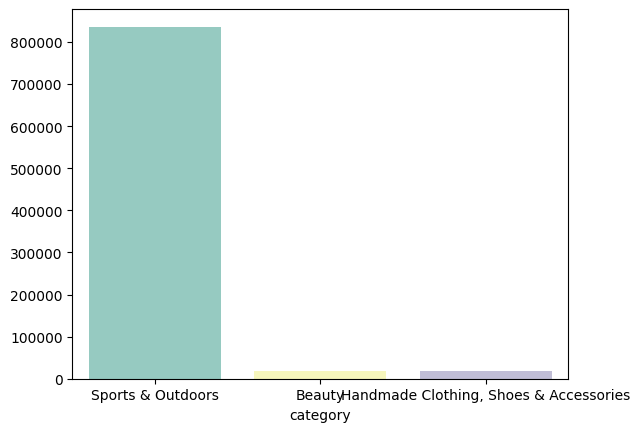

In [5]:
# 2.1.
# Using a subset due to the fact that x axis name overlap eachother due to number of words

sns.barplot(x = freq_table[0:3].index, y = freq_table[0:3].values, palette="Set3")
plt.show()

<Axes: ylabel='count'>

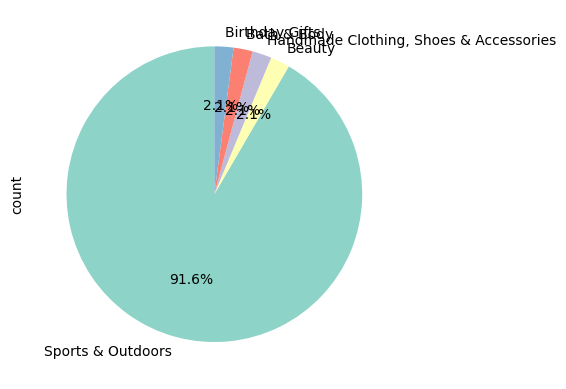

In [6]:
# 2.2.

freq_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

# Clear dominance of the 'Sports & Outdoors' category, assuming more than 90% of the listings 



Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

    1.Measures of Centrality:

        1.1.Calculate the mean, median, and mode for the price of products.
        1.2.What's the average price point of products listed? How does this compare with the most common price point (mode)?

    2.Measures of Dispersion:

        2.1.Determine the variance, standard deviation, range, and interquartile range for product price.
        2.2.How varied are the product prices? Are there any indicators of a significant spread in prices?

    3.Visualizations:

        3.1Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
        3.2Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [7]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [8]:
# 1.1.

price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

price_mean, price_median, price_mode

(np.float64(89.24380943923661), np.float64(19.09), np.float64(9.99))

In [9]:
# 1.2.

df['price'].min()
df['price'].max()

price_mean, price_mode

# The avg price of the listed products show a big deviation from the mode (most common price)
#   due to the fact that some of the listed products have high prices when compared with the majority of listings and some have value 0 -> min_price = 0 and max_price = 100000;
#   in this case one can say that, the mean price of listed products is highly influenced by very high prices in the listings, deviating a lot from the other measures (median and mode).

(np.float64(89.24380943923661), np.float64(9.99))

In [ ]:
# 2.1.

var_price = df["price"].var(ddof=0)
std_price = df["price"].std(ddof=0)

min_price = df["price"].min()
max_price = df["price"].max()
range_price = max_price - min_price

q1, q2, q3 = df["price"].quantile([0.25, 0.50, 0.75])
iqr_price = q3 - q1


print(var_price) 
print(std_price) 
print(range_price) 
print(iqr_price)

119445.43644262086
345.60879103781616
100000.0
36.0


In [11]:
# 2.2.

# When observing the variance value (var_price = 119445.436) one can infer that the difference between the lowest price
# and the highest is a big one.
# This is also supported by the value of the mean when comparing to the mode. The difference in the values is so big
# due to the outliers of price values.

<Axes: xlabel='price', ylabel='Count'>

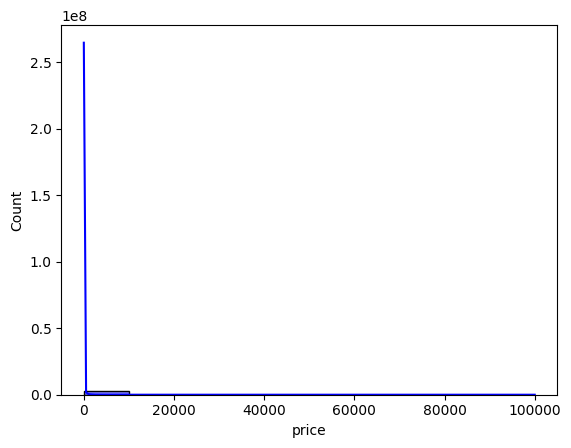

In [ ]:
# 2.3.

sns.histplot(df['price'], kde=True, bins=10, color='blue')

# The difficulty in reading this plot can be explain by the amount of data points as well as by the variance observed in the 'price' column
# The use of clusters of prices, bins containing price ranges and how many products fall in a given range, could help plot a more readable histogram 

Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

3.1.Measures of Centrality:

    3.1.1.Calculate the mean, median, and mode for the rating of products.

    3.1.2.How do customers generally rate products? Is there a common trend?

3.2.Measures of Dispersion:

    3.2.1.Determine the variance, standard deviation, and interquartile range for product rating.

    3.2.2.Are the ratings consistent, or is there a wide variation in customer feedback?

3.3.Shape of the Distribution:

    3.3.1.Calculate the skewness and kurtosis for the rating column.

    3.3.2.Are the ratings normally distributed, or do they lean towards higher or lower values?

3.4.Visualizations:

    3.4.1.Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [23]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
# 3.1.1.

rating_mean = df['stars'].mean()
rating_median = df['stars'].median()
rating_mode = df['stars'].mode()[0]

rating_mean, rating_median, rating_mode

(np.float64(2.152836472966066), np.float64(0.0), np.float64(0.0))

In [ ]:
# 3.1.2.

# looking at the measures obtained, one can assess that the clients rates are generally low reviews.
# With the mode and the median assuming low values (0) the clients reviews clearly have a low rate tendency

In [ ]:
# 3.2.1.

var_rating = df["stars"].var(ddof=0)
std_rating = df["stars"].std(ddof=0)

min_stars = df["stars"].min()
max_stars = df["stars"].max()
range_rating = max_stars - min_stars

q1, q2, q3 = df["stars"].quantile([0.25, 0.50, 0.75])
iqr_rating = q3 - q1


print(var_rating) 
print(std_rating) 
print(range_rating) 
print(iqr_rating)

4.817432058388496
2.1948649294178666
5.0
4.4


In [ ]:
# There is a very wide variation on customers ratings, showing how customer reviews go from very high to very low
# The range shows that the value is the same as the max value (5), indicate that the reviews are highly spread


In [28]:
# 3.3.1.

skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(np.float64(0.08120735761080881), np.float64(-1.9260061280432994))

In [ ]:
# The positive value of skewness shows a right-skew distribution with a longer tail in the higher ratings,
# althought a very slight one, the very is very low with basicly no consider value
#
# The rating distribution assumes a shape very far from that of a normal distribuiton, with no peak and no tails

<Axes: xlabel='stars', ylabel='Count'>

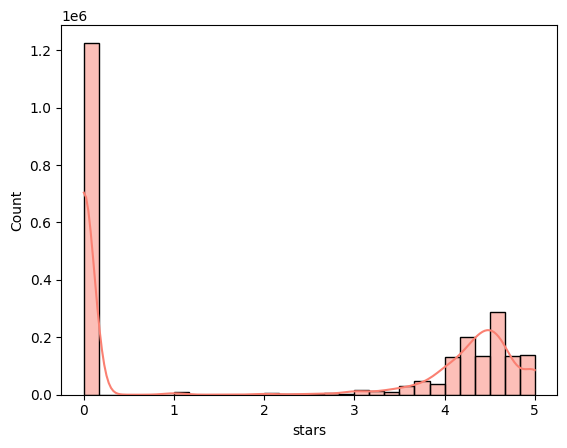

In [29]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

In [ ]:
# The predominant rating, as seen by the histogram, is 0 stars, with the majority of the reviews falaling in this value